# Práctica 3 - Regresión logística multi-clase y redes neuronales

## Regresión logística multi-clase

### Visualización de los datos

In [12]:
import numpy as np

In [18]:
from  scipy.io import loadmat

In [19]:
data = loadmat('datasets/ex3data1.mat')

y = data['y']
X = data['X']
print(X.shape, y.shape)

(5000, 400) (5000, 1)


In [20]:
import matplotlib.pyplot as plt

[3 6 8 9 8 8 1 2 7 4]


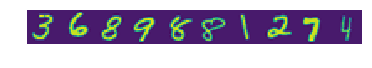

In [21]:
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape(-1, 20).T)
plt.axis('off')
print(np.ravel(y[sample]))

In [22]:
X = np.c_[np.ones(len(X)), X]
print(X.shape)

(5000, 401)


### Vectorización de la regresión logística

La implementación de la función sigmoide sigue la siguiente expresión: $$g(z)= \frac{1}{1 + e^{-z}}$$ 

siendo   $h_{\theta}(x^{(i)}) = g(\theta^{T}x^{(i)}) $

In [23]:
def sigmoid_function(z):
    return 1/(1 + np.e**(-z))

#### Vectorización de la función de coste

_Función coste_$$J(\theta) = \frac{1}{m}((log(g(X\theta))^{T}(-y) - (log(1 - g(X\theta))^{T}(1-y))$$

In [24]:
def cost_function(th, X, y, fun):
    fun_evaluated_xth = fun(np.dot(X, th))
    cost = (1/len(X))*(np.log(fun_evaluated_xth).T.dot(-y) - np.log(1-fun_evaluated_xth).T.dot(1-y))
    return cost

#### Vectorización del gradiente

_Gradiente_$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}X^{T}(g(X\theta)-y) $$

In [25]:
def cost_gradient(th, fun, x, y, m):
    cg = (1/m)*x.T.dot(fun(np.dot(x, th)) - y)
    return cg

#### Cálculo de la versión regularizada

_Función coste_
$$J(\theta) = \frac{1}{m}((log(g(X\theta))^{T}(-y) - (log(1 - g(X\theta))^{T}(1-y)) + \frac{\lambda}{2m}\sum_{j=1}^{n}{\theta^{2}_{j}}$$

_Gradiente_
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}X^{T}(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$

In [26]:
def cost_function_opt(th, x, y, reg):
    def fun(z):
        return 1/(1 + np.e**(-z))

    fun_evaluated_xth = fun(np.dot(x, th))
    cost = (1/len(X))*(np.log(fun_evaluated_xth).T.dot(-y) 
                       - np.log(1-fun_evaluated_xth).T.dot(1-y)) + (reg/2*len(X))*np.sum(np.power(th, 2))
    return cost

def cost_gradient_opt(th, x, y, reg):
    def fun(z):
        return 1/(1 + np.e**(-z))
    
    cg = (1/len(x))*x.T.dot(fun(np.dot(x, th)) - y) + np.dot(th, reg/len(X))
    return cg

### Clasificación de uno frente a todos

In [27]:
import scipy.optimize as opt

In [47]:
def oneVsAll(X, y, num_labels, reg):
    th_ret = []
    for i in range(1, num_labels + 1):
        result  = opt.fmin_tnc(func=cost_function_opt, x0=th,
                               fprime=cost_gradient_opt,
                               args=(X, np.vectorize(lambda x, l: 1 if x == l else 0)(y, i), reg))
        th_ret.append(result[0])
    return th_ret

In [48]:
th = np.zeros(len(X[0]))
reg = 0.1

In [50]:
th_train = oneVsAll(X, np.ravel(y), len(np.unique(y)), reg)

In [82]:
print ("Coste óptimo obtenido con scipy.optimize.fmin_tnc():\n\t{}".format([cost_function_opt(th_train[i], X, y, reg) 
                                                                       for i in range(0,len(th_train))]))

Coste óptimo obtenido con scipy.optimize.fmin_tnc():
	[array([-20.11266776]), array([-18.46294437]), array([-18.45871036]), array([-18.46299993]), array([-18.49762069]), array([-18.46310356]), array([-18.47036638]), array([-17.7451094]), array([-18.43862188]), array([-17.75602453])]


In [83]:
def model_evaluation(X, y, th, fun):
    num_hits = 0
    for index, x in enumerate(X):
        probability_per_classifier = np.array([fun(th[i].dot(x.T)) for i in range(0,len(th))])
        best_probability_prediction = np.argmax(probability_per_classifier)
        prediction_index = np.unravel_index(best_probability_prediction, probability_per_classifier.shape)
        prediction = prediction_index[0]+1

        print('Index:{}; Prediccion:{}; label:{}'.format(index, prediction, y[index]))
        if(prediction == y[index]):
            num_hits += 1
    return (num_hits/len(X))*100

In [84]:
evaluation_result = model_evaluation(X, y, th_train, sigmoid_function)
print("Porcentaje de aciertos sobre los casos de entrenamiento:{}%".format(evaluation_result))

Index:0; Prediccion:10; label:[10]
Index:1; Prediccion:10; label:[10]
Index:2; Prediccion:10; label:[10]
Index:3; Prediccion:10; label:[10]
Index:4; Prediccion:10; label:[10]
Index:5; Prediccion:10; label:[10]
Index:6; Prediccion:10; label:[10]
Index:7; Prediccion:10; label:[10]
Index:8; Prediccion:10; label:[10]
Index:9; Prediccion:10; label:[10]
Index:10; Prediccion:10; label:[10]
Index:11; Prediccion:10; label:[10]
Index:12; Prediccion:10; label:[10]
Index:13; Prediccion:10; label:[10]
Index:14; Prediccion:10; label:[10]
Index:15; Prediccion:10; label:[10]
Index:16; Prediccion:10; label:[10]
Index:17; Prediccion:10; label:[10]
Index:18; Prediccion:10; label:[10]
Index:19; Prediccion:10; label:[10]
Index:20; Prediccion:10; label:[10]
Index:21; Prediccion:10; label:[10]
Index:22; Prediccion:10; label:[10]
Index:23; Prediccion:10; label:[10]
Index:24; Prediccion:10; label:[10]
Index:25; Prediccion:10; label:[10]
Index:26; Prediccion:6; label:[10]
Index:27; Prediccion:10; label:[10]
Ind

Index:514; Prediccion:1; label:[1]
Index:515; Prediccion:8; label:[1]
Index:516; Prediccion:1; label:[1]
Index:517; Prediccion:1; label:[1]
Index:518; Prediccion:1; label:[1]
Index:519; Prediccion:1; label:[1]
Index:520; Prediccion:1; label:[1]
Index:521; Prediccion:8; label:[1]
Index:522; Prediccion:1; label:[1]
Index:523; Prediccion:1; label:[1]
Index:524; Prediccion:1; label:[1]
Index:525; Prediccion:1; label:[1]
Index:526; Prediccion:8; label:[1]
Index:527; Prediccion:1; label:[1]
Index:528; Prediccion:1; label:[1]
Index:529; Prediccion:1; label:[1]
Index:530; Prediccion:1; label:[1]
Index:531; Prediccion:10; label:[1]
Index:532; Prediccion:1; label:[1]
Index:533; Prediccion:8; label:[1]
Index:534; Prediccion:1; label:[1]
Index:535; Prediccion:1; label:[1]
Index:536; Prediccion:1; label:[1]
Index:537; Prediccion:1; label:[1]
Index:538; Prediccion:1; label:[1]
Index:539; Prediccion:1; label:[1]
Index:540; Prediccion:1; label:[1]
Index:541; Prediccion:1; label:[1]
Index:542; Predicci

Index:1112; Prediccion:10; label:[2]
Index:1113; Prediccion:8; label:[2]
Index:1114; Prediccion:2; label:[2]
Index:1115; Prediccion:2; label:[2]
Index:1116; Prediccion:2; label:[2]
Index:1117; Prediccion:2; label:[2]
Index:1118; Prediccion:2; label:[2]
Index:1119; Prediccion:6; label:[2]
Index:1120; Prediccion:2; label:[2]
Index:1121; Prediccion:2; label:[2]
Index:1122; Prediccion:2; label:[2]
Index:1123; Prediccion:10; label:[2]
Index:1124; Prediccion:2; label:[2]
Index:1125; Prediccion:1; label:[2]
Index:1126; Prediccion:2; label:[2]
Index:1127; Prediccion:8; label:[2]
Index:1128; Prediccion:10; label:[2]
Index:1129; Prediccion:1; label:[2]
Index:1130; Prediccion:10; label:[2]
Index:1131; Prediccion:6; label:[2]
Index:1132; Prediccion:2; label:[2]
Index:1133; Prediccion:1; label:[2]
Index:1134; Prediccion:2; label:[2]
Index:1135; Prediccion:2; label:[2]
Index:1136; Prediccion:2; label:[2]
Index:1137; Prediccion:2; label:[2]
Index:1138; Prediccion:2; label:[2]
Index:1139; Prediccion:2

Index:1927; Prediccion:8; label:[3]
Index:1928; Prediccion:8; label:[3]
Index:1929; Prediccion:3; label:[3]
Index:1930; Prediccion:3; label:[3]
Index:1931; Prediccion:3; label:[3]
Index:1932; Prediccion:3; label:[3]
Index:1933; Prediccion:8; label:[3]
Index:1934; Prediccion:3; label:[3]
Index:1935; Prediccion:3; label:[3]
Index:1936; Prediccion:3; label:[3]
Index:1937; Prediccion:8; label:[3]
Index:1938; Prediccion:8; label:[3]
Index:1939; Prediccion:8; label:[3]
Index:1940; Prediccion:6; label:[3]
Index:1941; Prediccion:3; label:[3]
Index:1942; Prediccion:3; label:[3]
Index:1943; Prediccion:3; label:[3]
Index:1944; Prediccion:3; label:[3]
Index:1945; Prediccion:8; label:[3]
Index:1946; Prediccion:3; label:[3]
Index:1947; Prediccion:3; label:[3]
Index:1948; Prediccion:3; label:[3]
Index:1949; Prediccion:3; label:[3]
Index:1950; Prediccion:3; label:[3]
Index:1951; Prediccion:3; label:[3]
Index:1952; Prediccion:3; label:[3]
Index:1953; Prediccion:3; label:[3]
Index:1954; Prediccion:3; la

Index:2482; Prediccion:4; label:[4]
Index:2483; Prediccion:4; label:[4]
Index:2484; Prediccion:9; label:[4]
Index:2485; Prediccion:4; label:[4]
Index:2486; Prediccion:4; label:[4]
Index:2487; Prediccion:4; label:[4]
Index:2488; Prediccion:4; label:[4]
Index:2489; Prediccion:4; label:[4]
Index:2490; Prediccion:4; label:[4]
Index:2491; Prediccion:4; label:[4]
Index:2492; Prediccion:4; label:[4]
Index:2493; Prediccion:4; label:[4]
Index:2494; Prediccion:4; label:[4]
Index:2495; Prediccion:4; label:[4]
Index:2496; Prediccion:4; label:[4]
Index:2497; Prediccion:4; label:[4]
Index:2498; Prediccion:8; label:[4]
Index:2499; Prediccion:4; label:[4]
Index:2500; Prediccion:8; label:[5]
Index:2501; Prediccion:2; label:[5]
Index:2502; Prediccion:5; label:[5]
Index:2503; Prediccion:5; label:[5]
Index:2504; Prediccion:8; label:[5]
Index:2505; Prediccion:8; label:[5]
Index:2506; Prediccion:8; label:[5]
Index:2507; Prediccion:10; label:[5]
Index:2508; Prediccion:10; label:[5]
Index:2509; Prediccion:1; 

Index:3051; Prediccion:6; label:[6]
Index:3052; Prediccion:6; label:[6]
Index:3053; Prediccion:6; label:[6]
Index:3054; Prediccion:10; label:[6]
Index:3055; Prediccion:6; label:[6]
Index:3056; Prediccion:8; label:[6]
Index:3057; Prediccion:6; label:[6]
Index:3058; Prediccion:6; label:[6]
Index:3059; Prediccion:6; label:[6]
Index:3060; Prediccion:10; label:[6]
Index:3061; Prediccion:6; label:[6]
Index:3062; Prediccion:6; label:[6]
Index:3063; Prediccion:6; label:[6]
Index:3064; Prediccion:6; label:[6]
Index:3065; Prediccion:6; label:[6]
Index:3066; Prediccion:6; label:[6]
Index:3067; Prediccion:6; label:[6]
Index:3068; Prediccion:6; label:[6]
Index:3069; Prediccion:6; label:[6]
Index:3070; Prediccion:2; label:[6]
Index:3071; Prediccion:6; label:[6]
Index:3072; Prediccion:6; label:[6]
Index:3073; Prediccion:6; label:[6]
Index:3074; Prediccion:6; label:[6]
Index:3075; Prediccion:6; label:[6]
Index:3076; Prediccion:6; label:[6]
Index:3077; Prediccion:6; label:[6]
Index:3078; Prediccion:8; 

Index:3429; Prediccion:6; label:[6]
Index:3430; Prediccion:6; label:[6]
Index:3431; Prediccion:6; label:[6]
Index:3432; Prediccion:6; label:[6]
Index:3433; Prediccion:6; label:[6]
Index:3434; Prediccion:6; label:[6]
Index:3435; Prediccion:6; label:[6]
Index:3436; Prediccion:2; label:[6]
Index:3437; Prediccion:6; label:[6]
Index:3438; Prediccion:6; label:[6]
Index:3439; Prediccion:6; label:[6]
Index:3440; Prediccion:8; label:[6]
Index:3441; Prediccion:8; label:[6]
Index:3442; Prediccion:6; label:[6]
Index:3443; Prediccion:6; label:[6]
Index:3444; Prediccion:6; label:[6]
Index:3445; Prediccion:6; label:[6]
Index:3446; Prediccion:6; label:[6]
Index:3447; Prediccion:6; label:[6]
Index:3448; Prediccion:6; label:[6]
Index:3449; Prediccion:6; label:[6]
Index:3450; Prediccion:6; label:[6]
Index:3451; Prediccion:6; label:[6]
Index:3452; Prediccion:6; label:[6]
Index:3453; Prediccion:6; label:[6]
Index:3454; Prediccion:6; label:[6]
Index:3455; Prediccion:6; label:[6]
Index:3456; Prediccion:6; la

Index:4172; Prediccion:8; label:[8]
Index:4173; Prediccion:8; label:[8]
Index:4174; Prediccion:8; label:[8]
Index:4175; Prediccion:8; label:[8]
Index:4176; Prediccion:8; label:[8]
Index:4177; Prediccion:8; label:[8]
Index:4178; Prediccion:8; label:[8]
Index:4179; Prediccion:8; label:[8]
Index:4180; Prediccion:8; label:[8]
Index:4181; Prediccion:8; label:[8]
Index:4182; Prediccion:8; label:[8]
Index:4183; Prediccion:8; label:[8]
Index:4184; Prediccion:8; label:[8]
Index:4185; Prediccion:8; label:[8]
Index:4186; Prediccion:8; label:[8]
Index:4187; Prediccion:8; label:[8]
Index:4188; Prediccion:8; label:[8]
Index:4189; Prediccion:8; label:[8]
Index:4190; Prediccion:8; label:[8]
Index:4191; Prediccion:8; label:[8]
Index:4192; Prediccion:8; label:[8]
Index:4193; Prediccion:8; label:[8]
Index:4194; Prediccion:9; label:[8]
Index:4195; Prediccion:8; label:[8]
Index:4196; Prediccion:8; label:[8]
Index:4197; Prediccion:8; label:[8]
Index:4198; Prediccion:8; label:[8]
Index:4199; Prediccion:8; la

Index:4505; Prediccion:9; label:[9]
Index:4506; Prediccion:3; label:[9]
Index:4507; Prediccion:7; label:[9]
Index:4508; Prediccion:9; label:[9]
Index:4509; Prediccion:10; label:[9]
Index:4510; Prediccion:9; label:[9]
Index:4511; Prediccion:9; label:[9]
Index:4512; Prediccion:9; label:[9]
Index:4513; Prediccion:7; label:[9]
Index:4514; Prediccion:9; label:[9]
Index:4515; Prediccion:7; label:[9]
Index:4516; Prediccion:9; label:[9]
Index:4517; Prediccion:9; label:[9]
Index:4518; Prediccion:9; label:[9]
Index:4519; Prediccion:7; label:[9]
Index:4520; Prediccion:9; label:[9]
Index:4521; Prediccion:9; label:[9]
Index:4522; Prediccion:7; label:[9]
Index:4523; Prediccion:9; label:[9]
Index:4524; Prediccion:9; label:[9]
Index:4525; Prediccion:9; label:[9]
Index:4526; Prediccion:4; label:[9]
Index:4527; Prediccion:9; label:[9]
Index:4528; Prediccion:9; label:[9]
Index:4529; Prediccion:9; label:[9]
Index:4530; Prediccion:9; label:[9]
Index:4531; Prediccion:7; label:[9]
Index:4532; Prediccion:9; l

Index:4837; Prediccion:9; label:[9]
Index:4838; Prediccion:9; label:[9]
Index:4839; Prediccion:9; label:[9]
Index:4840; Prediccion:8; label:[9]
Index:4841; Prediccion:9; label:[9]
Index:4842; Prediccion:7; label:[9]
Index:4843; Prediccion:7; label:[9]
Index:4844; Prediccion:1; label:[9]
Index:4845; Prediccion:8; label:[9]
Index:4846; Prediccion:9; label:[9]
Index:4847; Prediccion:9; label:[9]
Index:4848; Prediccion:9; label:[9]
Index:4849; Prediccion:4; label:[9]
Index:4850; Prediccion:9; label:[9]
Index:4851; Prediccion:9; label:[9]
Index:4852; Prediccion:4; label:[9]
Index:4853; Prediccion:4; label:[9]
Index:4854; Prediccion:8; label:[9]
Index:4855; Prediccion:9; label:[9]
Index:4856; Prediccion:9; label:[9]
Index:4857; Prediccion:9; label:[9]
Index:4858; Prediccion:9; label:[9]
Index:4859; Prediccion:10; label:[9]
Index:4860; Prediccion:1; label:[9]
Index:4861; Prediccion:9; label:[9]
Index:4862; Prediccion:9; label:[9]
Index:4863; Prediccion:7; label:[9]
Index:4864; Prediccion:4; l